[3 2 1 3 3 0 2 1 3 3 0 0 3 1 1 2 2 3 3 0 0 1 0 0 3 0 0 3 2 1 1 3 1 3 0 2 3
 0 1 2 1 3 2 2 0 2 1 0 1 1 1 2 0 0 3 2 2 2 0 3 3 2 1 2 0 1 3 1 0 0 1 2 0 1
 0 0 3 2 3 1 2 0 3 2 3 2 0 2 2 3 1 0 3 2 2 1 1 3 1 1]
[1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1]


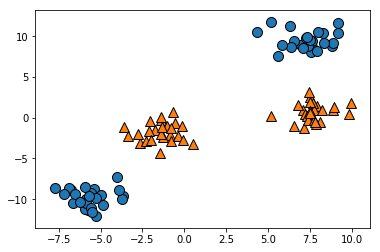

In [4]:
%matplotlib inline
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X,y = make_blobs(centers  = 4, random_state=8)
print(y)
y = y % 2
print(y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)